In [ ]:
| pvm         | data        | tekijä   |
| ---------   | -------     | -------- |
| 2019-02-27  | [Lastenhoidon tukien saajat ja maksetut tuet ](https://beta.avoindata.fi/data/fi/dataset/lastenhoidon-tukien-saajat-ja-maksetut-tuet) | Markus Kainu |

# Käyttöesimerkkejä: Lapsilisän saajat ja maksetut lapsilisät

## Resurssien lataaminen

In [1]:
from ckanapi import RemoteCKAN
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen
from pandas.io.json import json_normalize

ua = 'avoindata_ckanapi_example/1.0 ({0})'
ckan = RemoteCKAN('https://beta.avoindata.fi/data/fi/', user_agent=ua)
packages = ckan.action.package_search(q='Kansaneläkelaitos', fq = 'title:lastenhoidon')
resources = packages['results'][0]['resources'] 
url_csv = resources[0]['url']
url_json = resources[1]['url']
dat = pd.read_csv(url_csv, sep = ';', decimal = ',')

In [2]:
response = urlopen(url_json)
meta = json.loads(response.read())

## Datan ja metadatan kuvailu

**Datan kuvaustieto**

In [3]:
print(meta['description'])

Lastenhoidon tukia tilastointiajanjakson aikana saaneet perheet ja lapset, joista tukia on maksettu, maksetut tuet, keskimääräinen tuki sekä yksityisen päivähoidon tuottajan perimä hoitomaksu kuukaudessa. Lakisääteisten tukien lisäksi raportilta saa tiedot kuntien Kelan kautta maksamista kuntalisistä. Aluetiedot voi valita raportille joko tuen saajan asuinkunnan tai tuen maksaneen kunnan mukaan.Lastenhoidon tuilla tarkoitetaan taloudellista tukea lasten hoidon järjestämiseksi. Tukimuotoja ovat kotihoidon tuki, yksityisen hoidon tuki, osittainen hoitoraha ja joustava hoitoraha.


**Datan muuttujatieto**

In [4]:
json_normalize(meta['resources'][0]['schema']['fields'])

,format,name,title,type
0,default,kunta,kuvaus,string
1,default,vuosi,kuvaus,integer
2,default,tukien_sisalto,kuvaus,string
3,default,tukimuoto,kuvaus,string
4,default,saajat,kuvaus,integer
5,default,lapset,kuvaus,integer
6,default,maksetut_etuudet_euroa,kuvaus,number
7,default,tuki_per_saaja_e_kk,kuvaus,number
8,default,tuki_per_lapsi_e_kk,kuvaus,number
9,default,hoitomaksu_per_saaja_e_kk,kuvaus,integer


**Datan ensimmäiset rivit**

In [5]:
print(dat.head())

  kunta   vuosi      tukien_sisalto               tukimuoto  saajat  lapset  \
0  Akaa  2018.0  Lakisääteiset tuet                Yhteensä   355.0   462.0   
1  Akaa  2018.0  Lakisääteiset tuet         Kotihoidon tuki   264.0   365.0   
2  Akaa  2018.0  Lakisääteiset tuet  Yksityisen hoidon tuki    20.0    26.0   
3  Akaa  2018.0  Lakisääteiset tuet    Osittainen hoitoraha    56.0    57.0   
4  Akaa  2018.0  Lakisääteiset tuet      Joustava hoitoraha    50.0    49.0   

   maksetut_etuudet_euroa  tuki_per_saaja_e_kk  tuki_per_lapsi_e_kk  \
0               805236.55             312.1573             251.4208   
1               686767.42             401.0870             297.5806   
2                31247.01             189.7857             166.0625   
3                33290.33              96.9032              96.9032   
4                53931.79             188.9500             188.9500   

   hoitomaksu_per_saaja_e_kk  hoitomaksu_per_lapsi_e_kk  
0                   489.5714            

In [6]:
plotdat = (dat
 .query('vuosi == 2018')
 .query('tukimuoto == "Kotihoidon tuki"')
 .sort_values(by='tuki_per_saaja_e_kk', ascending=False)
 .head(20))

#plt.bar(plotdat, height = )

## Kuvio

<BarContainer object of 20 artists>

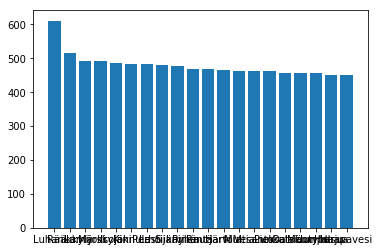

In [7]:
plt.bar(plotdat['kunta'], plotdat['tuki_per_saaja_e_kk'])

## Datastore-api

Jos et tarvitse koko aineistoa, voit suodattaa siitä osio SQL:llä käyttäen CKAN:n DataStore-rajapintaa.

Alla olevassa esimerkissä tehdään rajaus `kunta`-muuttujasta ja siis etsitään vaan kuntaa *Veteli* koskevat tiedot.

In [8]:
kunta = "Veteli"
taulu = resources[0]['id']
muuttuja = 'kunta'
urli = f'https://beta.avoindata.fi/data/fi/data/api/3/action/datastore_search_sql?sql=SELECT * from "{taulu}" WHERE {muuttuja} LIKE \'{kunta}\''
urli_plain = f'https://beta.avoindata.fi/data/fi/data/api/3/action/datastore_search_sql?sql=SELECT * from "{taulu}"'
#urli = "https://beta.avoindata.fi/data/fi/data/api/3/action/datastore_search_sql?sql=SELECT * from \"%s\" WHERE %s LIKE '%s'" % (taulu, muuttuja, kunta)
#urli_plain = "https://beta.avoindata.fi/data/fi/data/api/3/action/datastore_search_sql?sql=SELECT * from \"%s\"" % (taulu)
response = urlopen(urli_plain)
da = json.loads(response.read())
dataa = json_normalize(da['result']['records'])
#dataa
print(dataa.head())

                                          _full_text  _id  \
0  '1573':11 '2018':2 '251':12 '312':10 '355':6 '...    1   
1  '0':15,17 '0000':16,18 '0870':12 '2018':2 '264...    2   
2  '01':11 '0625':15 '166':14 '189':12 '20':8 '20...    3   
3  '0':15,17 '0000':16,18 '2018':2 '33':10 '33290...    4   
4  '0':15,17 '0000':16,18 '188':11,13 '2018':2 '4...    5   

  hoitomaksu_per_lapsi_e_kk hoitomaksu_per_saaja_e_kk kunta lapset  \
0                  428,3750                  489,5714  Akaa    462   
1                    0,0000                    0,0000  Akaa    365   
2                  428,3750                  489,5714  Akaa     26   
3                    0,0000                    0,0000  Akaa     57   
4                    0,0000                    0,0000  Akaa     49   

  maksetut_etuudet_euroa saajat tuki_per_lapsi_e_kk tuki_per_saaja_e_kk  \
0              805236,55    355            251,4208            312,1573   
1              686767,42    264            297,5806           